# 第十二章 多模态智能体

## 12.1 简介
<!-- 解释何为“多模态”，为何语言智能体需要具备多模态的能力才能适应更多任务场景，从虚拟文字空间走向真实世界。可以文字里提一嘴机器人，但不展开。 -->

随着大语言模型能力的持续扩展，智能体正从单一的“语言专家”演化为能够理解和操作多种模态的“通才系统”。所谓多模态（Multimodal），是指系统能够处理和理解多种信息形式，包括文本、图像、音频、视频，乃至动作控制信号等。相比只处理文本的语言智能体，多模态智能体可以感知视觉场景、听懂语音信息、解析视频动态，甚至在一定程度上驱动机器人等硬件系统，进行跨模态推理与决策，从而在更复杂、更真实的任务场景中发挥作用。

多模态处理是人类认知的基本特征——我们通过观察图像、聆听声音、阅读文字和感知空间环境来综合获取信息。因此，若希望智能体不仅活跃在“虚拟文字空间”中，而是真正服务于现实世界中的任务，例如教育、医疗、导航、创作，乃至机器人操作，就必须赋予其跨模态的理解与生成能力。多模态能力，是智能体迈向具身智能（Embodied Intelligence）与通用人工智能（AGI）的必经之路。

伴随着GPT-4V、Gemini、LLaVA、Qwen-VL 等多模态模型的出现，语言智能体已逐步具备初步的多模态交互能力。例如，用户可以上传一张图像，模型能生成文字描述、识别图中物体，甚至进行图文联合推理。进一步地，结合语音识别与合成技术，智能体可以与用户进行自然的语音对话，这拓展了其在移动设备、智能家居、车载系统中的实际应用。

此外，多模态不仅增强了智能体对世界的理解能力，也显著提升了其行为输出的表现力。除了直接以文本形式回应用户，现代智能体还能通过调用外部工具或模型，生成图像、音频、视频等多种形式的输出，从而在创意内容生成、虚拟助手、游戏开发等场景中大放异彩。

**本章重点内容**：本章将系统介绍多模态智能体的核心能力与关键组成，包括多模态输入与理解、多模态行为，并通过实战案例展示如何构建一个具备多模态交互能力的 GUI 智能体应用。通过本章的学习，读者将理解为何多模态是下一代智能体不可或缺的能力，以及如何在实际项目中逐步引入多模态技术。

## 12.2 多模态输入与理解
多模态智能体的首要能力，是接收并理解多种模态的数据。这不仅包括传统的自然语言文本，还涵盖图像、音频、视频等形式的信息输入。与纯文本输入相比，多模态输入更加贴近人类获取信息的方式，也使智能体具备了更强的任务适应能力。

多模态理解的核心在于将非语言模态的信息编码为可供语言模型处理的表示，从而实现统一的推理与响应机制。当前主流的实现路径，通常采用两种策略之一：一种是将图像、音频等内容转换为描述性文本，从而让语言模型以“阅读文字”的方式间接理解其他模态的信息；另一种是通过专门的模态感知模型（如视觉编码器、音频编码器等）提取特征，并与大语言模型融合，实现原生多模态理解。

在本小节中，我们将介绍当前常见的几种输入模态及其理解方式，帮助读者建立对多模态输入处理的整体认知框架。

### 12.2.1 以文本为介质的多模态理解

以文本为介质的多模态理解，是指通过将非语言模态（如图像、音频、视频）转化为文字形式，再输入给大语言模型进行理解和处理。由于大语言模型原生仅接受文本输入，若要直接处理其他模态，通常需要调整模型架构并进行多模态联合训练。通过“模态转文本”的方式，可以将感知任务交由专门的感知模型完成，再由语言模型处理抽象化后的语言信息。这一方法不仅提高了模型的复用性，还充分发挥了大语言模型在语言推理和上下文理解方面的优势，在早期多模态系统中被广泛采用，尤其是在资源受限或模型复用需求强烈的场景下。

![image](./chapter_12_images/multimodal_text.png)
<center>图12.1 以文本为介质的多模态理解示意图</center>

如图12.1所示，以文本为介质的多模态理解流程通常包括三个步骤：

1. **模态感知**：通过专用模型（如图像描述模型、语音识别模型）提取非语言模态的关键信息，感知结果多以向量表示进行表达和存储；
2. **文本生成**：将感知结果转化为自然语言描述，形成结构化或非结构化的文字；
3. **语言模型处理**：将生成的文本连同用户指令一起输入给大语言模型，由其完成推理、总结或行为决策。

在图像场景中，常见做法是使用图像描述生成（Image Captioning）模型，如 BLIP 或 GIT，将图像内容转化为文字描述。这些描述可涵盖整体情境（如颜色、动作、物体）以及通过目标检测提取的局部细节与空间关系，然后作为 prompt 的一部分输入给大语言模型。例如：“图像内容描述：一只戴着墨镜的猫坐在沙发上，旁边有一杯咖啡。用户问题：这只猫看起来快乐吗？”

在音频场景中，通常采用自动语音识别（Automatic Speech Recognition, ASR）模型（如 Whisper）将语音内容转录为文本。对于非语言音频，如环境声或情绪表达，可以通过声音事件识别（Sound Event Detection）或语音情感识别模型生成描述性文字，如“背景中有狗叫声”。这些文本化的输出可以与用户问题或系统指令一起送入语言模型进行联合推理。

视频模态的处理相对复杂，典型方法包括对视频进行逐帧采样，从中提取关键帧图像进行图像描述生成，并对音轨进行语音识别或音频事件识别。各类模态信息经统一转化为文本后，再由语言模型进行整合与理解。例如：“一名男子进入房间，背景音乐渐强。他坐下打开电脑，屏幕上出现了紧急警告。”此类复合性文字摘要即体现了多模态内容在语言层面的融合表达。

采用以文本为介质的方式处理多模态输入，有如下显著优势：

- **结构简洁，复用性强**：不需要修改现有的语言模型结构，只需在前处理阶段将多模态信息转换为文字输入，可以轻松适配各类现成的大语言模型。
- **高可解释性**：将图像或音频内容转化为文字后，输入内容变得透明可见，便于调试与追踪模型行为。
- **与提示工程高度兼容**：所有模态内容最终都统一成文本形式，可以自然嵌入 prompt 中，结合系统提示或用户指令进行联合理解。

然而，尽管以文本为介质的多模态理解实现门槛低、泛用性强，但其也存在一定局限性：

- **信息损失**：转化过程中可能丢失部分细节（如图像中的空间关系、语音中的情绪变化等），影响后续推理的准确性；
- **感知与推理解耦**：感知模型和语言模型往往分开训练，导致系统整体效果难以端到端优化；
- **表达能力受限**：某些模态本身具有高维度、强结构性的特点，难以通过一段线性文本准确表达。

因此，在一些高精度、多细节依赖的场景中（如视频事件识别、复杂图文推理等），以文本为介质的多模态理解可能无法满足需求，需要引入融合模型或联合训练机制来弥补。

### 12.2.2 原生多模态理解

相较于以文本为介质的多模态理解策略，原生多模态理解指的是智能体在输入阶段就直接接受图像、音频、视频等非语言模态的原始表示，不依赖中间的文本转化，从而实现更紧密的模态融合与更丰富的信息感知能力。这种方法通常要求智能体具备统一的多模态输入通道，或在内部进行模态对齐、融合、协同建模。

![image](./chapter_12_images/multimodal_encode.png)
<center>图12.2 原生多模态理解示意图</center>

如图12.2所示，要构建具备原生多模态理解的智能体，通常需要以下步骤：

1. **模态编码**：针对每种模态使用专门的编码器（如 Vision Transformer、音频特征提取器等）将原始多模态输入转化为统一的嵌入表示；
2. **模态融合**：将不同模态的表示通过对齐机制、融合模块（如跨模态注意力）整合到共享语义空间；
3. **任务建模**：将融合后的信息输入语言模型或下游任务头，实现问答、推理、指令执行等目标；
4. **端到端训练**：通过大规模多模态数据联合训练，使模型在多个模态上共同优化性能，学习语义联系。

图像理解是多模态能力扩展的首要方向。与传统“图像转文本”的方式不同，原生图像理解通过视觉编码器（如 CLIP、ViT、SigLIP 等）将图像编码为向量表示，并与语言模型共享语义空间或进行对齐，从而使语言模型能够“读懂”图像内容。在更复杂的系统中，图像与文本通过交叉注意力机制进行深度融合，使模型能够对图像中的细节、空间关系、颜色、文字等进行准确推理。例如在图像问答（Visual Question Answering, VQA）任务中，模型可以直接接受一张图片和一个问题作为输入，无需预先生成描述性文字，就能直接回答诸如“图中人物右手拿的是什么？”这类需要空间定位和语义识别的复杂问题。

在音频理解方面，原生多模态模型能够直接处理音频波形或其特征表示（如梅尔频谱图）。这通常通过将音频输入传入音频编码器（如 Wav2Vec 2.0、Whisper encoder 等）生成音频特征向量，然后将其与文本信息联合建模。相比于以文本为介质的多模态理解，这种方法在情感识别、说话人识别、音频事件识别等更复杂的场景中具有更强的优势。例如，一个原生多模态模型可以在识别到“愤怒的语气”时及时调整文本生成策略，或结合语音音调和语义内容完成更精确的情感判断。

视频作为时序信息与图像、音频的复合体，是更复杂的一种输入模态。对于其中的视觉信息，可以从视频中采样关键帧，通过视频编码器（如 TimeSformer、VideoMAE、BEiT-3）提取每帧或帧段的视觉特征。对于音频信息，可使用与音频处理相同的模型进行编码。最后，将视觉帧序列和音频特征以时间为主轴进行同步建模，捕捉事件进展、行为变化、因果关系等时序信息。

原生多模态理解相比文本为介质的策略有诸多优势：

- **信息保真度更高**：用编码向量而非文本描述的形式去感知多模态输入，能保留原始模态中的细节和结构（如图像空间布局、音频中的情绪信号、视频中的动作时序）；
- **建模能力更强**：通过联合训练或多模态预训练，模型可以学习不同模态间的深层关系，形成更精细的理解；
- **更贴近人类感知系统**：人类并非通过文字中介理解世界，原生处理策略更符合类脑智能的认知路径。

但同时，原生多模态系统也面临不小的挑战：

- **系统复杂度更高**：需要引入多个模态专属模块与统一的融合机制，模型结构更庞大；
- **训练与推理成本高昂**：多模态大模型在数据、计算资源上的需求显著高于文本模型；
- **模态协同难度大**：不同模态之间具有异构性（如采样率、维度、时序结构），需要有效的对齐与融合策略。

尽管如此，原生多模态理解正成为下一代智能体系统的关键组成部分，尤其在通用智能助手、机器人、AR/VR 应用、具身智能等任务中展现出广阔前景。

### 12.3 多模态行为

多模态智能体不仅要理解来自图像、音频、视频等多源输入的信息，还应具备多模态的输出能力，即“多模态行为”。所谓“行为”，在智能体系统中通常体现为对外部世界的影响或反馈，在多模态场景下，则表现为生成图像、音频、视频等非文本模态的内容，这标志着智能体开始从“语言理解者”向“多感官行动者”演化。

目前，大多数多模态智能体在行为层仍然以文本生成为核心机制，通过调用外部工具（Tool Use）来实现多模态的输出。这种以文本为枢纽的策略不仅延续了大语言模型在自然语言生成方面的强项，也保持了整个系统的模块化、灵活性和可控性。

在典型的多模态行为架构中，语言模型通过生成特定的指令或函数调用格式，引导系统调用专用工具，完成非语言模态的输出：

- **图像生成**：通过生成文本形式的图像描述，调用扩散模型（如 Stable Diffusion、DALL·E、Midjourney 等），实现从文本到图像的转换。语言模型负责构造具备内容、风格、结构要素的提示文本。
- **语音生成**：通过生成包含情绪、语速、角色等要素的文本输入，调用语音合成系统（如 VALL-E、Bark、Tortoise TTS）输出语音内容。语言模型可同时参与语音场景规划、脚本生成与风格控制。
- **视频生成**：虽然当前视频生成仍处于早期发展阶段，但已有初步实践，如通过调用文本驱动的视频生成工具（如 Sora）或合成图像序列形成短视频。语言模型提供结构化脚本或分镜式描述，引导生成过程。
- **工具调用**：通过以文本形式生成符合特定格式的工具调用指令，调用下游工具完成各种任务。

这一机制下，大语言模型相当于**多模态控制中心**，负责统一的意图表达、任务规划与输出协调。

尽管当前主流方案采用“文本中介 + 工具调用”的方式实现多模态行为，业界也在探索更原生、一体化的生成路径，使模型直接生成多模态信号，如：

- **图像 token 生成器**：如 GIT、BLIP-2 等模型尝试让 Transformer 直接输出图像 patch token，最终复原图像；
- **音频 token 预测模型**：如 AudioLM、Voicebox，通过语言模型直接预测离散音频单元，再经解码器还原音频；
- **端到端视频生成模型**：如 VideoPoet，构建具备语音、图像、动作生成能力的统一 Transformer 模型，实现直接从文本到视频的生成。

当前多模态行为的主流路径仍是以文本为中介，通过工具调用完成图像、音频、视频等模态的输出任务。这一策略兼具灵活性、可控性和工程可落地性，是构建实用多模态智能体的重要基础。而“原生多模态生成”作为前沿探索方向，仍在持续演进中，有望在未来推动多模态行为能力向更高层次发展。


## 12.4 实战：GUI智能体 - 手机个人助手

多模态智能体不仅可以理解图像、音频、视频等多模态输入，还可以展现出强大的多模态行为，这使得它能够在复杂的交互环境中主动执行任务、控制界面和影响外部世界。在移动终端场景中（如手机、平板等），智能体可以基于屏幕截图的图像信息去理解用户界面，并结合任务目标规划出点击、滑动等操作序列，从而模拟人类用户对手机系统的使用过程。本节将通过一个完整的示例，展示如何构建基于视觉语言模型（VLM）驱动的手机 GUI 智能体。

首先，安装必要工具库：

In [ ]:
!pip install qwen-vl-utils
!pip install Pillow

接下来，我们需要创建一个环境接口，用于获取当前手机界面截图并执行操作。为了简单起见，在这里仅使用了预先保存的静态手机截图。

In [2]:
from PIL import Image

class Environment:
    def __init__(self):
        self.image_idx = 0

    def get_screenshot(self):
        """
        获取当前手机屏幕截图。
        本示例中使用本地图片模拟多轮截图获取过程。
        实际部署中可以通过 ADB 等方式获取实时截图。
        """
        images = [Image.open(f"./chapter_12_images/screenshot_{i}.jpg") for i in range(4)]
        self.image_idx += 1
        assert self.image_idx <= len(images), "没有更多的截图可用"
        return images[self.image_idx - 1]

    def execute_action(self, action):
        """
        执行动作，如点击某个位置或滑动操作。
        本处为示意接口，实际应调用手机系统 API 实现真实执行。
        """
        print(f"执行动作：{action}")

我们选用 Qwen2.5-VL-7B-Instruct 作为 GUI 智能体的基础模型，它具有强大的视觉理解与定位能力，能够很好的支持构建手机个人助手，我们将其封装在`VLMWrapper`中。

In [ ]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

class VLMWrapper:
    def __init__(self):
        # 加载模型
        self.model = Qwen2_5_VLForConditionalGeneration.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct", torch_dtype="auto", device_map="auto")
        self.processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct")

    def predict(self, messages) -> str:
        # 将消息转换为模型输入格式
        text = self.processor.apply_chat_template(
            messages, tokenize=False, add_generation_prompt=True
        )
        image_inputs, video_inputs = process_vision_info(messages)
        inputs = self.processor(
            text=[text],
            images=image_inputs,
            videos=video_inputs,
            padding=True,
            return_tensors="pt",
        )
        inputs = inputs.to("cuda")

        # 模型推理，生成输出结果
        generated_ids = self.model.generate(**inputs, max_new_tokens=128)
        generated_ids_trimmed = [
            out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
        ]
        output_text = self.processor.batch_decode(
            generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
        )[0]
        return output_text


接下来，我们构建 GUI 智能体 GUIAgent，它是多模态手机助手系统的核心组件，负责将用户任务、操作历史和当前界面截图输入到视觉语言模型中，生成合理的下一步操作动作，从而实现对手机系统的逐步控制。该类封装了完整的任务执行流程，包括状态管理、图像分析、操作预测与任务控制。其主要函数如下：

- `__init__`：初始化智能体，设置环境、视觉语言模型、最大交互步数以及系统提示词。

- `reset`：重置任务状态，包括清空历史记录和当前目标。

- `step`：进行单步交互，获取当前截图，构造多模态输入，调用模型预测思考与操作动作，并返回结果。

- `run`：以用户目标为驱动，持续调用 step 执行操作，直到任务完成或达到最大步数限制。

下面是 GUIAgent 的完整实现代码：

In [4]:
class GUIAgent:
    def __init__(self, env: Environment, vlm: VLMWrapper, max_steps: int = 10):
        self.env = env
        self.vlm = vlm
        self.max_steps = max_steps
        self.goal = None
        self.histories = []
        self.system_prompt = """
你正在使用移动设备。你可以根据给定的任务和截图使用给定的操作动作与移动设备进行交互。

## 操作动作
你可以使用一下任一动作作为下一步的操作：
- click(point=[x,y]): 点击屏幕上指定的坐标点(x,y)
- long_press(point=[x,y]): 长按屏幕指定的坐标点(x,y)
- type(text='hello world'): 输入一段文本字符串
- scroll(start_point=[x1,y1], end_point=[x2,y2]): 滚动屏幕，(x1,y1) 为起始坐标位置，(x2,y2) 为结束坐标位置。
- press_home(): 回到主页
- press_back(): 返回上一页
- wait():等待加载完成
- finished(): 任务完成

请你根据用户指令、历史动作记录、以及当前的手机截图，输出下一步的操作动作。

## 输出格式
Thought: 思考过程
Action: 下一步的操作动作
""".strip()
    
    def reset(self):
        """
        重置智能体状态，清空历史记录
        """
        self.goal = None
        self.histories = []

    def step(self) -> str:
        """
        单步交互，分析当前截图并输出操作动作（点击哪里、滑动等）
        """

        # 获取当前手机截图
        screenshot = self.env.get_screenshot()

        # 构造消息内容
        if self.histories is None:
            history_content = "无"
        else:
            history_content = "; ".join([f"第{i+1}步: {h}" for i, h in enumerate(self.histories)])
        messages = [
            {"role": "system", "content": [{"type":"text", "text": self.system_prompt}]},
            {"role": "user", "content": [
                {"type": "text", "text": f"用户指令：{self.goal}\n历史操作记录：{history_content}"},
                {"type": "image", "image": screenshot}
            ]}
        ]

        # 调用 VLM 进行预测
        response = self.vlm.predict(messages)

        # 解析响应
        try:
            thought = response.split("Thought:")[1].split("Action:")[0].strip()
            action = response.split("Action:")[1].strip()
        except:
            print("响应格式错误，无法解析。")
            thought, action = None, None

        return thought, action

    def run(self, goal: str):
        """
        完整任务执行，接受用户目标和手机截图序列，逐步操作。
        返回每一步的操作描述。
        """
        self.reset()
        self.goal = goal

        for step in range(self.max_steps):
            print(f"第{step+1}步:")
            thought, action = self.step()
            print(f"思考过程: {thought}")
            print(f"输出动作: {action}")
            self.env.execute_action(action)
            self.histories.append(action)

            # 检查是否完成任务
            if "finished()" in action:
                print("任务完成")
                return

        print("超出最大步数限制，任务未完成。")

实例化环境、模型、GUI 智能体，运行示例：

In [5]:
env = Environment()
vlm = VLMWrapper()
agent = GUIAgent(env, vlm)
agent.run("关闭wifi")

Loading checkpoint shards: 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


第1步:
思考过程: 要关闭WiFi，首先需要进入设置页面。在当前界面中，可以看到“设置”图标，点击该图标可以进入设置页面。
输出动作: click(point=[160,1845])
执行动作：click(point=[160,1845])
第2步:
思考过程: 用户想关闭WiFi，从当前页面可以看到WLAN选项，点击该选项可以进入WiFi设置页面。
输出动作: click(point=[273,1309])
执行动作：click(point=[273,1309])
第3步:
思考过程: 用户想关闭WiFi，当前页面显示了WLAN设置界面，可以看到WLAN开关已打开。需要点击开关将其关闭。
输出动作: click(point=[955,512])
执行动作：click(point=[955,512])
第4步:
思考过程: 用户已经关闭了WiFi，所以任务已完成。
输出动作: finished()
执行动作：finished()
任务完成


从输出结果可以看出，GUI 智能体通过一系列基于界面理解的点击操作，成功导航至 WiFi 设置页面并关闭了 WiFi，最后通过视觉确认判断任务已完成，顺利结束了整个交互过程，体现出良好的多模态感知能力和多轮推理能力。

为了检查 GUI 智能体输出的坐标是否准确，我们对第一步的点击操作进行可视化：

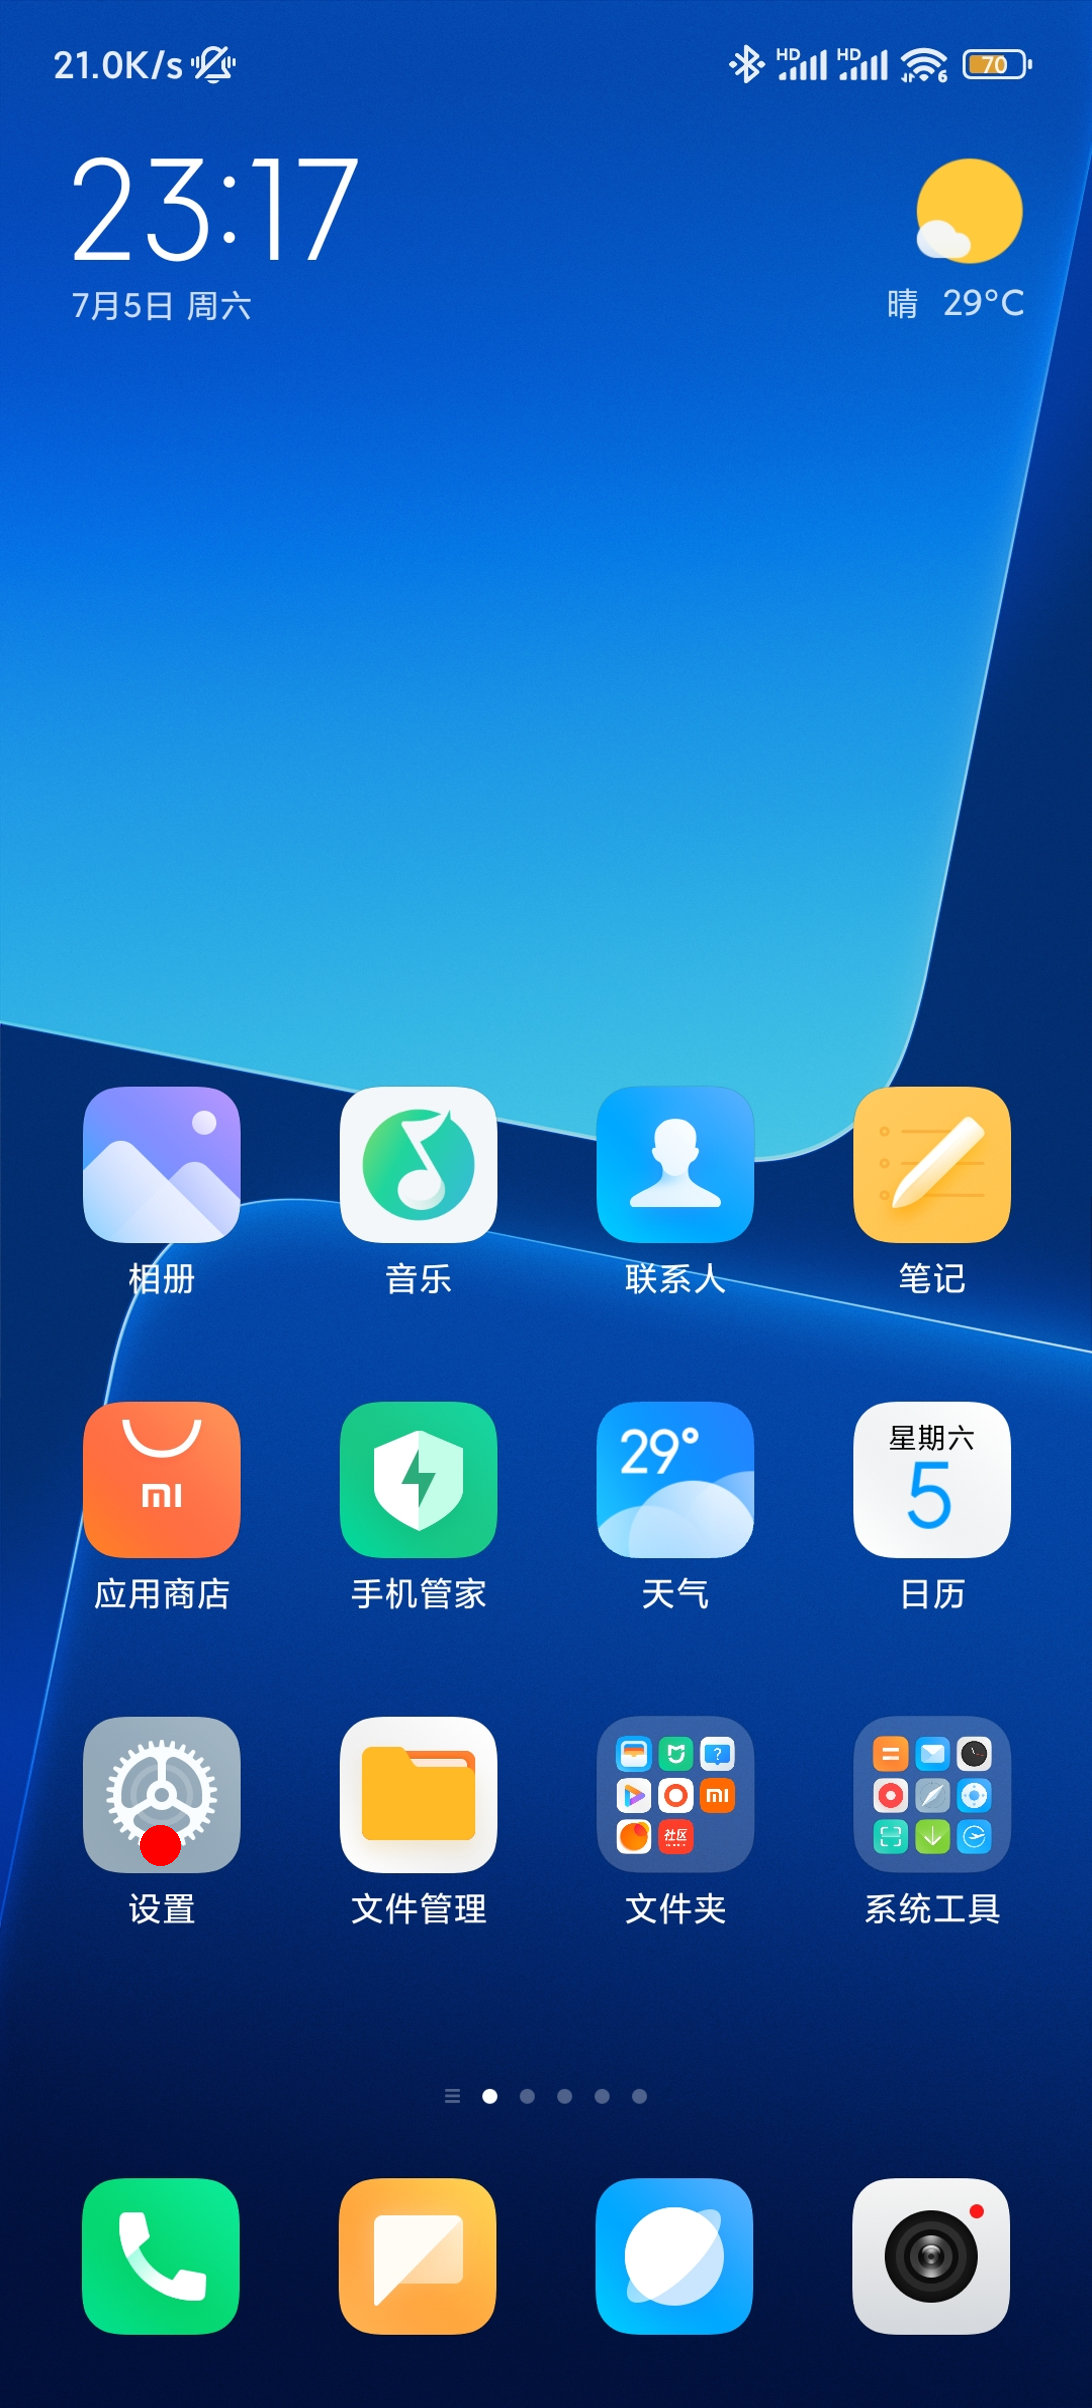

In [7]:
from qwen_vl_utils import smart_resize

# 获取第一步的动作与截图
action = agent.histories[0]
screenshot = Image.open(f"./chapter_12_images/screenshot_0.jpg")

# 模型在处理图片时会对图片进行缩放处理，这里我们遵循相同的处理方式
resized_height, resized_width  = smart_resize(screenshot.height, screenshot.width)
screenshot = screenshot.resize((resized_width, resized_height))

# 绘图函数
def show_point(image, point):
    """
    在图片上绘制一个点
    :param image: PIL Image对象
    :param point: 点的坐标 (x, y)
    """
    from PIL import ImageDraw

    draw = ImageDraw.Draw(image)
    x, y = point
    radius = 20
    draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill='red')
    return image

# 解析动作中的坐标点并绘制
point = [int(coord) for coord in action.split('[')[1].split(']')[0].split(',')]
screenshot_with_point = show_point(screenshot, point)
screenshot_with_point.show()

可以看到，GUI 智能体输出坐标位置成功落在了“设置”图标上。

## 12.5 小结

本章围绕多模态智能体的关键能力与实现路径进行了系统梳理。我们首先从整体上讨论了为何语言智能体需要具备多模态理解与行为能力。随后，我们详细介绍了多模态输入的两种主要处理范式：一是文本中介方法，将图像、音频、视频等模态转化为文本形式输入大语言模型，二是原生建模方法，通过原生融合模型直接理解并处理多模态信息。同时，我们还讨论了多模态行为的实现方式，即语言模型生成操作指令，借助外部工具实现图像生成、语音合成或界面控制等功能。我们还通过一个实战案例，展示了视觉语言模型与操作控制系统结合的实际应用。随着多模态感知、理解与行为的不断进步，智能体正在逐步具备类似人类的综合认知与行动能力，迈向更通用、更具适应性的智能系统形态。

## 12.6 课后习题

1. 除了图像、音频、视频，你还能想到哪些类型的多模态数据？请至少列举两种，并说明它们可能应用在哪些任务场景中。
   
参考答案：

- 时间序列数据：如心率、环境温度，应用于健康监测、运动追踪。
- 触觉传感数据：如机器人手臂的压力、振动反馈，应用于远程手术、柔性制造。
- 3D 点云数据：应用于自动驾驶、无人机障碍物识别。
- 文本和结构化数据结合：如用户评论+购买记录，应用于推荐系统。

2. 你认为“多模态智能体”未来在日常生活中最有潜力的应用场景有哪些？请举例并简述理由。

参考答案：

- 家庭助手：能听懂语音、看懂环境（摄像头），识别危险情况（如火灾、老人摔倒）。
- 医疗辅助：同时分析病历文字、医学影像、患者语音描述，辅助诊断。
- 智能车载系统：整合语音指令、车内摄像头、道路环境，提升驾驶安全性。

3. 多模态智能体可能涉及用户隐私数据（如图像、人声、视频监控等），你认为设计这类系统时需要重点关注哪些伦理问题？如何解决？

参考答案：

伦理问题：
- 数据隐私泄露：未经同意的视频、语音采集。
- 算法歧视：性别、年龄、种族偏见。
- 透明性问题：模型决策过程不透明。

解决方法：
- 明确数据使用规范，加密存储与权限控制。
- 模型公平性测试，消除偏见。
- 强化可解释性研究，公开模型机制。

4. 假如你要为盲人用户开发一款智能导盲助手，结合视觉、语音和触觉模态，你会如何设计它的交互方式？

参考答案：

设计思路：
- 视觉模态：摄像头采集环境图像，识别障碍物、交通信号。
- 语音模态：用户可语音提问当前环境情况，助手语音播报反馈。
- 触觉模态：手柄或腕带震动提示障碍物距离或方向。

交互方式：
- 遇障碍物→震动+语音播报：“前方 2 米有低矮障碍”
- 红绿灯检测→语音提示“请等待红灯”
- 用户问“前方是否有台阶？”→助手实时分析并语音回应。

5. 你认为当前 GUI 智能体主要面临哪些挑战？未来可在哪些方面优化？

参考答案：

挑战：
- 控件识别鲁棒性差：界面元素样式多样、布局复杂，识别易出错。
- 跨应用迁移性弱：训练好的 GUI 智能体在不同软件或版本界面上表现差异大。
- 多模态协同困难：需要将语言指令、界面视觉信息、用户上下文合理融合。
- 界面动态变化难预测：如弹窗、动画、滑动列表动态加载控件。

优化方向：
- 增强控件语义嵌入，将界面元素与操作语义联动学习。
- 利用自监督数据采集，自动记录用户操作行为提升泛化能力。
- 增强 GUI 动态状态预测与多步任务规划能力。

## 12.7 参考文献

[1] How to Bridge the Gap between Modalities: Survey on Multimodal Large Language Model

[2] Qwen2.5-VL Technical Report